--- Step 1: News Articles Loaded Successfully ---
3918 documents loaded from 4 categories.

--- Step 2: Feature Extraction Complete ---
TF-IDF matrix created with shape: (3918, 20137)



C:\Users\tilak\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\tilak\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\tilak\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tilak\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

--- Step 3: K-Means Clustering Complete ---

--- Cluster Analysis: Top terms per cluster ---
Cluster 0: space, just, like, know, don, think, people, time, does, thanks
Cluster 1: game, year, team, games, hit, baseball, runs, braves, players, pitching
Cluster 2: israel, armenian, jews, israeli, armenians, people, arab, turkish, arabs, jewish
Cluster 3: god, jesus, christ, church, sin, people, believe, christians, christian, bible

Cluster visualization saved as 'document_clusters_pca.png'

--- Analysis Complete ---


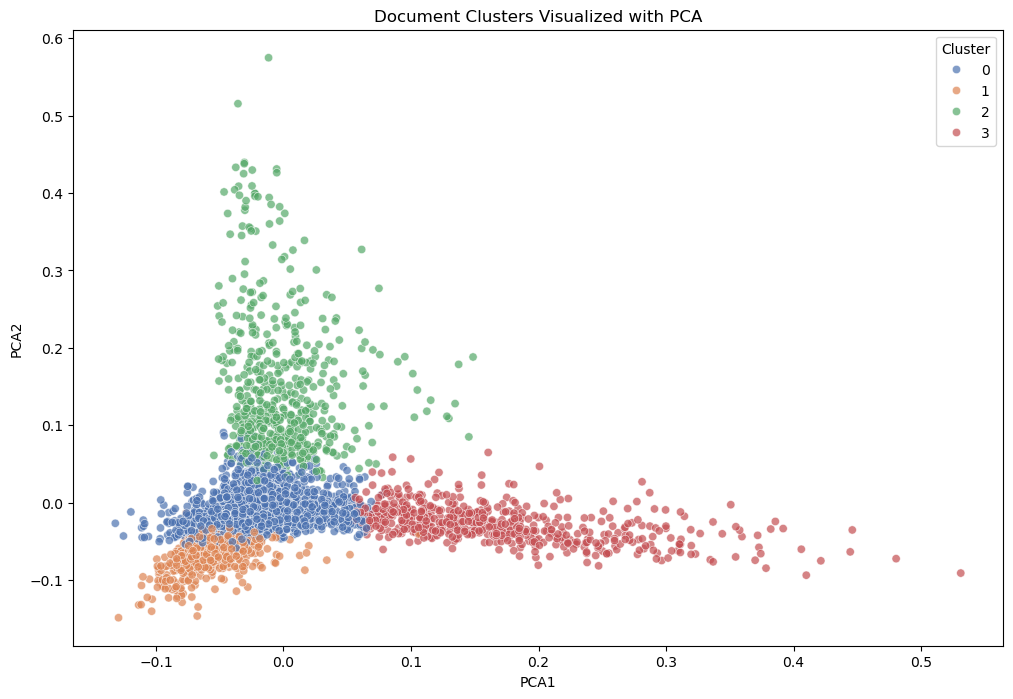

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # --- Step 1: Load the Data ---
    # We select 4 distinct categories from the built-in dataset.
    categories = [
        'soc.religion.christian',
        'talk.politics.mideast',
        'sci.space',
        'rec.sport.baseball'
    ]
    # We remove headers, footers, and quotes to focus on the article content.
    dataset = fetch_20newsgroups(subset='all', categories=categories,
                                 shuffle=True, random_state=42,
                                 remove=('headers', 'footers', 'quotes'))
    
    print("--- Step 1: News Articles Loaded Successfully ---")
    print(f"{len(dataset.data)} documents loaded from {len(categories)} categories.\n")

    # --- Step 2: Feature Extraction (TF-IDF) ---
    # Convert the raw text into a matrix of TF-IDF features.
    # We ignore very common words (max_df) and very rare words (min_df).
    vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')
    X_tfidf = vectorizer.fit_transform(dataset.data)
    
    print("--- Step 2: Feature Extraction Complete ---")
    print(f"TF-IDF matrix created with shape: {X_tfidf.shape}\n")

    # --- Step 3: Apply K-Means ---
    # We set k to the number of categories we loaded.
    k = len(categories)
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    cluster_labels = kmeans.fit_predict(X_tfidf)
    print(f"--- Step 3: K-Means Clustering Complete ---\n")

    # --- Analysis: Find Top Terms per Cluster ---
    print("--- Cluster Analysis: Top terms per cluster ---")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    
    for i in range(k):
        top_terms = [terms[ind] for ind in order_centroids[i, :10]]
        print(f"Cluster {i}: {', '.join(top_terms)}")
    
    # --- Visualization (using PCA for dimensionality reduction) ---
    # Reduce the high-dimensional TF-IDF data to 2 dimensions for plotting.
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_tfidf.toarray())
    
    df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
    df_pca['Cluster'] = cluster_labels
    
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='deep', alpha=0.7)
    plt.title('Document Clusters Visualized with PCA')
    plt.savefig('document_clusters_pca.png')
    print("\nCluster visualization saved as 'document_clusters_pca.png'")
    print("\n--- Analysis Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")